# Задачи исследования


## 1. Осмотр данных

        - посмотрим начало и конец датасета
        - сделаем предварительные выводы
        - поищем аномалии


## 2. Обработка данных

        - найти и обработать пропуски
        - заменить некорректные типы данных
        - удалить дубликаты
        - подсчитать и добавить цену квадратного метра
        - добавить день недели, месяц и год объявления
        - добавить этаж - первый, последний, другой
        - добавить соотношение жилой и общей площади, а также отношение площади кухни к общей


## 3. Ответы на вопросы

        - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

        - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики
        и постройте графики. Сколько обычно длится процесс продажи?

        - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа
        комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

        - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом
        объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

        - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите
        самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов
        с ценой по всем предложениям и объявлениям в вашей выборке.

        - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
        Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.


## 4. Результаты исследования

        - Общие выводы
        - Рекомендации


### Описание данных

        airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
        balcony — число балконов
        ceiling_height — высота потолков (м)
        cityCenters_nearest — расстояние до центра города (м)
        days_exposition — сколько дней было размещено объявление (от публикации до снятия)
        first_day_exposition — дата публикации
        floor — этаж
        floors_total — всего этажей в доме
        is_apartment — апартаменты (булев тип)
        kitchen_area — площадь кухни (м²)
        last_price — цена на момент снятия с публикации
        living_area — жилая площадь (м²)
        locality_name — название населённого пункта
        open_plan — свободная планировка (булев тип)
        parks_around3000 — число парков в радиусе 3 км
        parks_nearest — расстояние до ближайшего парка (м)
        ponds_around3000 — число водоёмов в радиусе 3 км
        ponds_nearest — расстояние до ближайшего водоёма (м)
        rooms — число комнат
        studio — квартира-студия (булев тип)
        total_area — площадь квартиры в квадратных метрах (м²)
        total_images — число фотографий квартиры в объявлении

In [152]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Осмотр данных


# Посмотрим начало и конец датасета

In [153]:
data = pd.read_csv('C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/2) Исследовательский анализ данных/real_estate_data.csv')
data

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [154]:
# Удалим 1 колонку ( она дублирует индексы )

data = data.drop(data.columns[0], axis=1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [155]:
# Меняем названия колонок на русский язык


data_columns_default = data.columns # Сохраняем названия колонок (на всякий)

data_columns = pd.Series(data.columns).map({  'airports_nearest': 'расстояние до ближайшего аэропорта в метрах (м)',
                                              'balcony': 'число балконов',
                                              'ceiling_height': 'высота потолков (м)',
                                              'cityCenters_nearest' : 'расстояние до центра города (м)',
                                              'days_exposition': 'сколько дней было размещено объявление (от публикации до снятия)',
                                              'first_day_exposition': 'дата публикации',
                                              'floor' : 'этаж',
                                              'floors_total' : 'всего этажей в доме',
                                              'is_apartment': 'апартаменты (булев тип)',
                                              'kitchen_area': 'площадь кухни (м²)',
                                              'last_price' : 'цена на момент снятия с публикации',
                                              'living_area' : 'жилая площадь (м²)',
                                              'locality_name' : 'название населённого пункта',
                                              'open_plan' : 'свободная планировка (булев тип)',
                                              'parks_around3000' : 'число парков в радиусе 3 км',
                                              'parks_nearest' : 'расстояние до ближайшего парка (м)',
                                              'ponds_around3000' : 'число водоёмов в радиусе 3 км',
                                              'ponds_nearest' : 'расстояние до ближайшего водоёма (м)',
                                              'rooms' : 'число комнат',
                                              'studio' : 'квартира-студия (булев тип)',
                                              'total_area' : 'площадь квартиры в квадратных метрах (м²)',
                                              'total_images' : 'число фотографий квартиры в объявлении'})
data.columns = data_columns
data

,число фотографий квартиры в объявлении,цена на момент снятия с публикации,площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,апартаменты (булев тип),...,площадь кухни (м²),число балконов,название населённого пункта,расстояние до ближайшего аэропорта в метрах (м),расстояние до центра города (м),число парков в радиусе 3 км,расстояние до ближайшего парка (м),число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (м),сколько дней было размещено объявление (от публикации до снятия)
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [156]:
# Посмотрим на данные с точки зрения пропусков 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   число фотографий квартиры в объявлении                            23699 non-null  int64  
 1   цена на момент снятия с публикации                                23699 non-null  float64
 2   площадь квартиры в квадратных метрах (м²)                         23699 non-null  float64
 3   дата публикации                                                   23699 non-null  object 
 4   число комнат                                                      23699 non-null  int64  
 5   высота потолков (м)                                               14504 non-null  float64
 6   всего этажей в доме                                               23613 non-null  float64
 7   жилая площадь (м²)             

In [157]:
data.describe() # Видим, что нет отрицательных значений по каждому признаку

,число фотографий квартиры в объявлении,цена на момент снятия с публикации,площадь квартиры в квадратных метрах (м²),число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,площадь кухни (м²),число балконов,расстояние до ближайшего аэропорта в метрах (м),расстояние до центра города (м),число парков в радиусе 3 км,расстояние до ближайшего парка (м),число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (м),сколько дней было размещено объявление (от публикации до снятия)
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Рассмотрим каждый из признаков на аномалии

In [158]:
data.describe()['цена на момент снятия с публикации']

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: цена на момент снятия с публикации, dtype: float64

In [159]:
# число фотографий квартиры в объявлении пропускаем - все данные в формате int и нет пропусков
# Рассмотрим цену на момент снятия с публикации

data['цена на момент снятия с публикации'] # Проблема в восприятии такой длинной цифры (с большим кол-вом нулей)
                                           # Доведем до млн. руб и сменим названии колонки + предположим, что цена в рублях (это не было заявлено)

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: цена на момент снятия с публикации, Length: 23699, dtype: float64

In [160]:
data['цена на момент снятия с публикации'] = (data['цена на момент снятия с публикации']/1000000)
data['цена на момент снятия с публикации']  # Проверка

0        13.000
1         3.350
2         5.196
3        64.900
4        10.000
          ...  
23694     9.700
23695     3.100
23696     2.500
23697    11.475
23698     1.350
Name: цена на момент снятия с публикации, Length: 23699, dtype: float64

In [161]:
data = data.rename({'цена на момент снятия с публикации': 'цена на момент снятия с публикации (млн. руб.)'}, axis = 1)
data

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,апартаменты (булев тип),...,площадь кухни (м²),число балконов,название населённого пункта,расстояние до ближайшего аэропорта в метрах (м),расстояние до центра города (м),число парков в радиусе 3 км,расстояние до ближайшего парка (м),число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (м),сколько дней было размещено объявление (от публикации до снятия)
0,20,13.000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3.100,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2.500,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11.475,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [162]:
# Площадь квартиры

data.describe()['площадь квартиры в квадратных метрах (м²)']    # нет нулевых значений
                                                                # есть довольно большое значение площади (900 м2)

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: площадь квартиры в квадратных метрах (м²), dtype: float64

In [163]:
# Дата публикации

data['дата публикации'] = pd.to_datetime(data['дата публикации'])   # Время излишняя информация (все по нулям) --> уберем его 
data['дата публикации'] # Проверка

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: дата публикации, Length: 23699, dtype: datetime64[ns]

In [164]:
# Число комнат 

data.describe()['число комнат']  # есть 0-ое количество комнат, посмотрим на количество таких позиций

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: число комнат, dtype: float64

In [165]:
index_0_komnat_and_studia = data[(data['число комнат'] == 0) & (data['квартира-студия (булев тип)'] == True)].index     # Находим индексы помещений с 0 кол-вом комнат с пометкой - студия
index_0_komnat = data[data['число комнат'] == 0].index                                                                  # Находим индексы помещений с 0 комнат
index_0_komnat_not_studia = index_0_komnat[~index_0_komnat.isin(index_0_komnat_and_studia)]                             # Находим индексы 2-го массива которые не совпадают с индексами 1-го массива

data.iloc[index_0_komnat_not_studia]['свободная планировка (булев тип)'].unique()   # Видим, что у всех помещений с 0 комнат и не студии - свободная планировка
                                                                                    # Пока оставим так, противоречий нет    

array([ True])

In [166]:
# высота потолков (м)

data.describe()['высота потолков (м)'] # видим что есть потолок высотой 100 метров (посмотрим на эти данные), также смущает потолок 1 метр

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: высота потолков (м), dtype: float64

In [167]:
data[data['высота потолков (м)']>= 10].describe()               

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,площадь кухни (м²),число балконов,расстояние до ближайшего аэропорта в метрах (м),расстояние до центра города (м),число парков в радиусе 3 км,расстояние до ближайшего парка (м),число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (м),сколько дней было размещено объявление (от публикации до снятия)
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,20.00000,18.000000,16.000000,16.000000,16.000000,8.000000,16.000000,8.000000,19.000000
mean,9.720000,4.917960,53.232000,1.880000,27.976000,9.640000,32.420000,5.840000,9.23500,2.333333,28004.812500,13675.625000,0.687500,493.375000,1.125000,312.750000,143.526316
std,7.328711,2.906094,20.241906,0.881287,15.691937,8.395832,14.237597,5.436604,2.77873,1.414214,14766.572241,10791.381536,0.873212,233.040118,1.310216,220.063465,155.466813
min,0.000000,1.700000,25.000000,0.000000,10.300000,2.000000,14.000000,1.000000,5.20000,1.000000,11647.000000,3246.000000,0.000000,223.000000,0.000000,30.000000,7.000000
25%,4.000000,3.300000,42.000000,1.000000,25.000000,5.000000,21.300000,2.000000,7.75000,1.250000,18122.750000,8362.500000,0.000000,374.000000,0.000000,78.250000,27.500000
50%,9.000000,3.950000,45.000000,2.000000,26.000000,5.000000,30.100000,3.000000,9.00000,2.000000,27041.000000,12253.000000,0.500000,428.500000,0.500000,390.000000,71.000000
75%,17.000000,5.600000,58.000000,2.000000,27.000000,14.000000,37.700000,5.000000,11.00000,2.000000,35310.500000,13980.500000,1.000000,569.500000,2.250000,465.250000,232.500000
max,20.000000,15.000000,98.000000,4.000000,100.000000,36.000000,73.000000,19.000000,16.50000,5.000000,68923.000000,50649.000000,3.000000,967.000000,3.000000,578.000000,540.000000


Есть данные с более чем 10 метровыми потолками и даже 100 метровый потолок, скорее всего это опечатка в объявлении
таких данных всего 25 помещений (на фоне почти 24000 помещений это капля в море --> можно такие удалить), но для последующего анализа эти данные не влияют,
впринципе этот столбец вообще можно удалить 
Если бы выборка была малочисленна - я бы поменял 100 метров на 10 метров (такие потолки возможны), а может даже и удалил бы это помещение
А значения 20-100 поменял на стандартное 2,5 - 3,5 м

Также потолки высотой 1 метр - аномальные данные

Вывод - данные по потолкам не рассматриваем вообще (они не повлияют на дальнейший анализ)

Понимаем, что множество данных владельцам квартир просто лень заполнять или считать 
( как например расстояние до аэропорта, жилая площадь, и тд.) Но на эту информацию смотрят при покупке, поэтому убирать их не стоит
Уберем всю ненужную ифнормацию 

In [168]:
# Жилая площадь и площадь квартиры это практически одинаковая информация
# К жилой площади относятся только те помещения, которые пригодны для проживания: гостиная, спальня, детская. Сюда не относятся: кухня, санузлы, коридор, кладовые и гардеробные
# Также есть очевидные опечатки в высоте потолков и множество пустых данных

In [169]:
# На информацию об количестве этажей в доме обычно смотрят при покупке. 
# Нам повезло - всего 86 продавцов не указали кол-во этажей, на фоне довольно большой выборки (можно их удалить - но пока оставим)

In [170]:
# Рассмотрим колонку: апартаменты (булев тип)


data['апартаменты (булев тип)'].unique() 

array([nan, False, True], dtype=object)

In [171]:
len(data[data['апартаменты (булев тип)'].isnull() == True])     # бОльшая часть выборки с nan в вппартаментах - заменим их на false

20924

In [172]:
data['апартаменты (булев тип)'] = data['апартаменты (булев тип)'].fillna(False)
data['апартаменты (булев тип)'].unique()    # проверка

array([False,  True])

In [173]:
# Посмотрим на столбец квартира-студия (как и столбец "свободная планировка")

data['квартира-студия (булев тип)'].unique()    # Тут все хорошо

array([False,  True])

In [174]:
# Стобец с числом балконов с можестивенными пропусками (но нам это не мешает)
# Рассмотрим столбец - "название населённого пункта"

data['название населённого пункта'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23699 entries, 0 to 23698
Series name: название населённого пункта
Non-Null Count  Dtype 
--------------  ----- 
23650 non-null  object
dtypes: object(1)
memory usage: 185.3+ KB


In [175]:
# Удалим строки без название населенного пункта (странные объявления)

data = data[data['название населённого пункта'].notnull()]

In [176]:
data['название населённого пункта'].unique()    # 1) Приведем все в нижний регистр
                                                # 2) "посёлок" --> "поселок" (заменим букву "ё" на "е")

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [177]:
data['название населённого пункта'] = data['название населённого пункта'].str.lower()
data['название населённого пункта'] = data['название населённого пункта'].str.replace('ё', 'е')
data['название населённого пункта'].unique()    # проверка

C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\774762518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['название населённого пункта'] = data['название населённого пункта'].str.lower()
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\774762518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['название населённого пункта'] = data['название населённого пункта'].str.replace('ё', 'е')


array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [178]:
# Посмотрим на посление столбцы с расстояниями до определенных мест (Множество незаполненных данных, на эти данные обращают внимание при покупке)
# Заменим расстояние в метрах на километры, и как следствие поменяем название колонок

data[['расстояние до ближайшего аэропорта в метрах (м)', 'расстояние до центра города (м)','расстояние до ближайшего парка (м)','расстояние до ближайшего водоёма (м)']] = data[['расстояние до ближайшего аэропорта в метрах (м)', 'расстояние до центра города (м)','расстояние до ближайшего парка (м)','расстояние до ближайшего водоёма (м)']].apply(lambda x: x/1000)
data[['расстояние до ближайшего аэропорта в метрах (м)', 'расстояние до центра города (м)','расстояние до ближайшего парка (м)','расстояние до ближайшего водоёма (м)']]

slovar_rename = {'расстояние до ближайшего аэропорта в метрах (м)':'расстояние до ближайшего аэропорта в метрах (км)',
                 'расстояние до центра города (м)' : 'расстояние до центра города (км)',
                 'расстояние до ближайшего парка (м)': 'расстояние до ближайшего парка (км)',
                 'расстояние до ближайшего водоёма (м)' : 'расстояние до ближайшего водоёма (км)'}

data = data.rename(slovar_rename, axis = 1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   число фотографий квартиры в объявлении                            23650 non-null  int64         
 1   цена на момент снятия с публикации (млн. руб.)                    23650 non-null  float64       
 2   площадь квартиры в квадратных метрах (м²)                         23650 non-null  float64       
 3   дата публикации                                                   23650 non-null  datetime64[ns]
 4   число комнат                                                      23650 non-null  int64         
 5   высота потолков (м)                                               14490 non-null  float64       
 6   всего этажей в доме                                               2356

C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\3009205232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['расстояние до ближайшего аэропорта в метрах (м)', 'расстояние до центра города (м)','расстояние до ближайшего парка (м)','расстояние до ближайшего водоёма (м)']] = data[['расстояние до ближайшего аэропорта в метрах (м)', 'расстояние до центра города (м)','расстояние до ближайшего парка (м)','расстояние до ближайшего водоёма (м)']].apply(lambda x: x/1000)


In [179]:
# Рассмотрим столбец "сколько дней было размещено объявление (от публикации до снятия)"

data['сколько дней было размещено объявление (от публикации до снятия)'] # Пока нас все устраивает (есть пропуски - далее по заданию посмотрим)

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: сколько дней было размещено объявление (от публикации до снятия), Length: 23650, dtype: float64

In [180]:
# Дубликаты отсутствуют

data.duplicated().sum()

0

In [181]:
# Посчитать и добавить цену квадратного метра

data['цена м2 (млн. руб.)'] = data['цена на момент снятия с публикации (млн. руб.)'] / data['площадь квартиры в квадратных метрах (м²)']
data['цена м2 (млн. руб.)'] # Проверка

0        0.120370
1        0.082921
2        0.092786
3        0.408176
4        0.100000
           ...   
23694    0.072491
23695    0.052542
23696    0.044092
23697    0.149511
23698    0.041796
Name: цена м2 (млн. руб.), Length: 23650, dtype: float64

In [182]:
# добавить день недели, месяц и год объявления

data['Публикация (день недели)'] = data['дата публикации'].dt.day_name()
data['Публикация (месяц)'] = data['дата публикации'].dt.month_name()
data['Публикация (год)'] = data['дата публикации'].dt.year

data[['Публикация (день недели)', 'Публикация (месяц)', 'Публикация (год)' ]] # Проверка

,Публикация (день недели),Публикация (месяц),Публикация (год)
0,Thursday,March,2019
1,Tuesday,December,2018
2,Thursday,August,2015
3,Friday,July,2015
4,Tuesday,June,2018
...,...,...,...
23694,Tuesday,March,2017
23695,Monday,January,2018
23696,Sunday,February,2018
23697,Tuesday,March,2017


In [183]:
# добавить этаж - первый, последний, другой

def floor_rename(df):
    if df['этаж'] == 1:
        return 'первый'
    if df['этаж'] == df['всего этажей в доме']:
        return 'последний'
    else:
        return 'другой'

data['наименование этажа'] = data.apply(floor_rename, axis = 1)

data['наименование этажа']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: наименование этажа, Length: 23650, dtype: object

In [184]:
# добавить соотношение жилой и общей площади, а также отношение площади кухни к общей

data['доля жилой площади'] = (data['жилая площадь (м²)'] / data['площадь квартиры в квадратных метрах (м²)']).round(2)
data['доля площади кухни'] = (data['площадь кухни (м²)'] / data['площадь квартиры в квадратных метрах (м²)']).round(2)
data[['доля жилой площади', 'доля площади кухни']]

,доля жилой площади,доля площади кухни
0,0.47,0.23
1,0.46,0.27
2,0.61,0.15
3,NaN,NaN
4,0.32,0.41
...,...,...
23694,0.55,0.10
23695,0.64,0.14
23696,0.52,NaN
23697,NaN,0.30


## 3. Ответы на вопросы

        - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

        - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики
        и постройте графики. Сколько обычно длится процесс продажи?

        - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа
        комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

        - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом
        объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

        - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите
        самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов
        с ценой по всем предложениям и объявлениям в вашей выборке.

        - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
        Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.


#### Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

In [185]:
# Посмотрим на мат. информацию по каждому цифровому столбцу

data.describe()

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,площадь кухни (м²),число балконов,...,расстояние до центра города (км),число парков в радиусе 3 км,расстояние до ближайшего парка (км),число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (км),сколько дней было размещено объявление (от публикации до снятия),цена м2 (млн. руб.),Публикация (год),доля жилой площади,доля площади кухни
count,23650.000000,23650.000000,23650.000000,23650.000000,14490.000000,23565.000000,21752.000000,23650.000000,21381.000000,12137.000000,...,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,23650.000000,23650.000000,21752.000000,21381.000000
mean,9.862326,6.541127,60.329069,2.070106,2.771287,10.675875,34.448356,5.893277,10.566403,1.153003,...,14.197861,0.611577,0.490831,0.769680,0.518060,180.753200,0.099432,2017.370021,0.564729,0.187338
std,5.682278,10.896399,35.661808,1.078620,1.261593,6.594823,22.037664,4.883317,5.901753,1.071169,...,8.606830,0.802003,0.342554,0.937948,0.277842,219.777916,0.050338,1.037806,0.105447,0.073077
min,0.000000,0.012190,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.181000,0.000000,0.001000,0.000000,0.013000,1.000000,0.000112,2014.000000,0.020000,0.030000
25%,6.000000,3.400000,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,9.241000,0.000000,0.288000,0.000000,0.293000,45.000000,0.076615,2017.000000,0.500000,0.130000
50%,9.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,...,13.105000,0.000000,0.454500,1.000000,0.502000,95.000000,0.095000,2017.000000,0.570000,0.170000
75%,14.000000,6.799000,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,...,16.293000,1.000000,0.612000,1.000000,0.730000,231.000000,0.114274,2018.000000,0.640000,0.230000
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,65.968000,3.000000,3.190000,3.000000,1.344000,1580.000000,1.907500,2019.000000,1.000000,0.790000


Необычные параметры: 


            1) Цена 763 млн. руб. и цена 12190 руб.
            2) Площадь квартиры 900 м2 (Хотя за городом такое возможно, но все равно - аномалия)
            3) 19 комнат
            4) 100 м - высота потолков или высота потолков - 1 м
            5) 60 этажей в доме
            6) Площадь кухни 112 м2 , 1.3 м2
            7) Жилая площадь 2 м2

In [186]:
# Напишем функцию для отбора безвыбросного датасета


def vibros_identification(df, column_name):
    
    
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3-q1     # интерквартильный размах 


    filter_for_kolonka = (df[column_name] >= (q1 - 1.5*IQR)) & (df[column_name] <= (q3 + 1.5*IQR))   # Получаем признак без выбросов


    return filter_for_kolonka

In [187]:
# Список основных параметров

spisok_main_priznakov = ['цена на момент снятия с публикации (млн. руб.)',
                         'площадь квартиры в квадратных метрах (м²)',
                         'всего этажей в доме',
                         'высота потолков (м)',
                         'площадь кухни (м²)',
                         'жилая площадь (м²)']


In [188]:
# Выведем отфильтрованный датафрейм

data_new = data.copy()

for column_name in spisok_main_priznakov:
    indexes = data_new[vibros_identification(data, column_name)].index
    data_new = data_new.loc[indexes] 
    
data_new

C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\3334752842.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = data_new[vibros_identification(data, column_name)].index
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\3334752842.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = data_new[vibros_identification(data, column_name)].index
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\3334752842.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = data_new[vibros_identification(data, column_name)].index
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\3334752842.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = data_new[vibros_identification(data, column_name)].index
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\3334752842.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = da

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,апартаменты (булев тип),...,число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (км),сколько дней было размещено объявление (от публикации до снятия),цена м2 (млн. руб.),Публикация (день недели),Публикация (месяц),Публикация (год),наименование этажа,доля жилой площади,доля площади кухни
9,18,5.40,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,289.0,0.088525,Sunday,February,2017,другой,0.71,0.11
10,5,5.05,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,2.0,0.553,137.0,0.127525,Thursday,November,2017,другой,0.51,0.21
13,20,3.55,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,3.0,0.298,366.0,0.082944,Saturday,July,2017,последний,0.63,0.12
16,11,6.70,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,0.0,NaN,397.0,0.081707,Thursday,November,2017,первый,0.68,0.11
18,8,3.25,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,0.0,NaN,168.0,0.104839,Friday,January,2017,другой,0.63,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9.20,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,0.0,NaN,23.0,0.091089,Monday,April,2019,другой,0.62,0.15
23689,13,3.55,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,2.0,0.652,29.0,0.100567,Wednesday,February,2018,другой,0.46,0.26
23691,11,9.47,72.9,2016-10-13,2,2.75,25.0,40.3,7,False,...,1.0,0.806,519.0,0.129904,Thursday,October,2016,другой,0.55,0.15
23693,9,4.60,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,0.675,239.0,0.073718,Friday,August,2016,другой,0.64,0.13


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

In [189]:
# Выведем типичные параметры продаваемых квартир + среднюю длительность продажи

mean_data = pd.concat([data[[*spisok_main_priznakov, 'сколько дней было размещено объявление (от публикации до снятия)' ]].mean(),
                       data_new[[*spisok_main_priznakov, 'сколько дней было размещено объявление (от публикации до снятия)' ]].mean()], 
                       axis = 1).rename({0:'с выбросами', 1: 'без выбросов'}, axis=1).round(2)

mean_data   # В среднем 180 дней нужно для продажи

,с выбросами,без выбросов
цена на момент снятия с публикации (млн. руб.),6.54,4.84
площадь квартиры в квадратных метрах (м²),60.33,52.70
всего этажей в доме,10.68,10.29
высота потолков (м),2.77,2.65
площадь кухни (м²),10.57,9.04
жилая площадь (м²),34.45,30.59
сколько дней было размещено объявление (от публикации до снятия),180.75,180.84


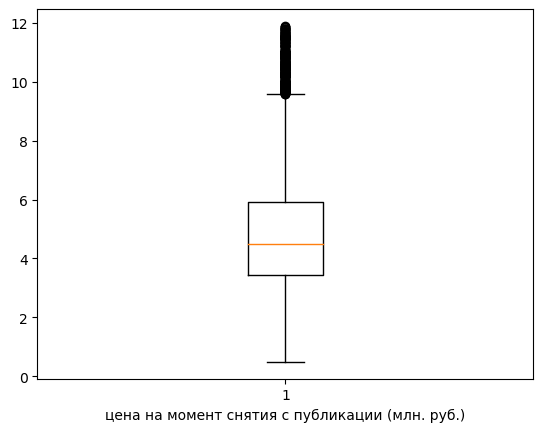

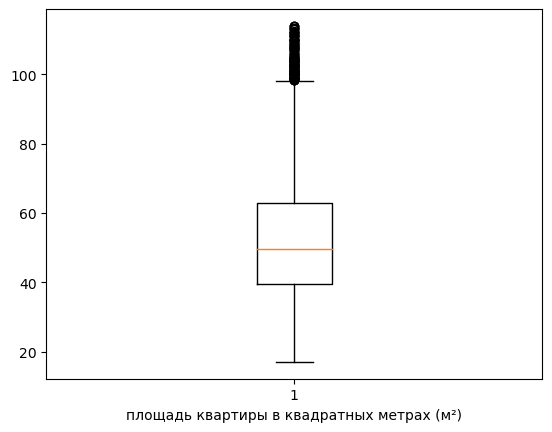

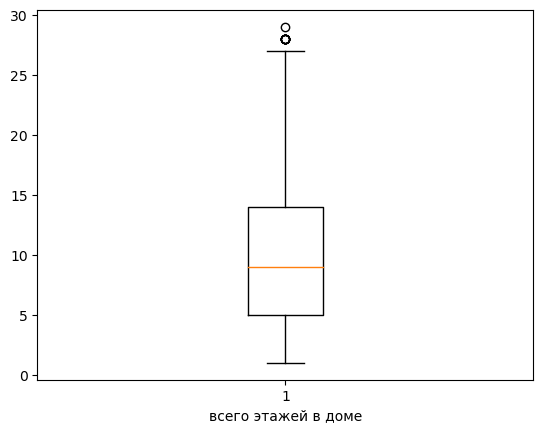

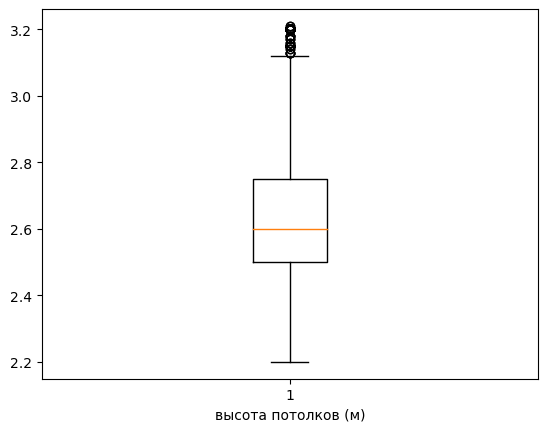

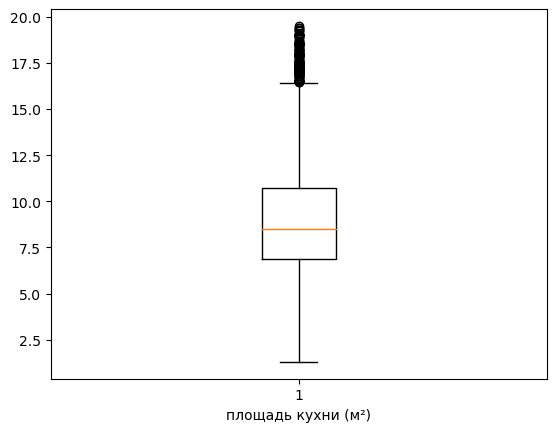

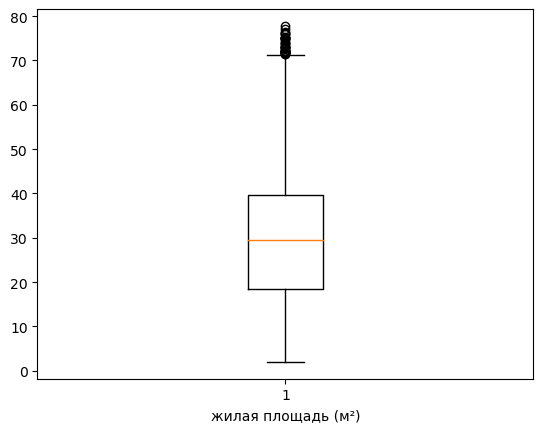

In [190]:
def boxplot_postroenie(df, column_names):
    for column_name in column_names:
        plt.boxplot(data = df, x = column_name)
        plt.xlabel(column_name)
        plt.show()


boxplot_postroenie(data_new, spisok_main_priznakov)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

In [191]:
# Коэффициент корреляции (для анализа зависимости цены м2 от других показателей)

data_new[data_new.describe().columns].corr()['цена м2 (млн. руб.)'].sort_values(ascending= False)

цена м2 (млн. руб.)                                                 1.000000
цена на момент снятия с публикации (млн. руб.)                      0.621867
всего этажей в доме                                                 0.379174
доля площади кухни                                                  0.315638
высота потолков (м)                                                 0.266529
этаж                                                                0.262947
площадь кухни (м²)                                                  0.230029
число фотографий квартиры в объявлении                              0.115866
Публикация (год)                                                    0.107320
число парков в радиусе 3 км                                         0.071173
число водоёмов в радиусе 3 км                                       0.064214
число балконов                                                      0.063724
расстояние до ближайшего парка (км)                                 0.018425

От чего зависит цена квадратного метра:

            1) кол-во этажей в доме
            2) цена на момент снятия (это очевидный факт при рассматривании м2)
            3) от расстояния до центра города

In [192]:
# Рассмотрим от чего зависит цена квартиры

data_new[data_new.describe().columns].corr()['цена на момент снятия с публикации (млн. руб.)'].sort_values(ascending= False)

цена на момент снятия с публикации (млн. руб.)                      1.000000
площадь квартиры в квадратных метрах (м²)                           0.685747
цена м2 (млн. руб.)                                                 0.621867
жилая площадь (м²)                                                  0.563766
площадь кухни (м²)                                                  0.485290
число комнат                                                        0.434240
высота потолков (м)                                                 0.431715
всего этажей в доме                                                 0.275598
этаж                                                                0.182155
число балконов                                                      0.161368
число фотографий квартиры в объявлении                              0.152539
число водоёмов в радиусе 3 км                                       0.110865
число парков в радиусе 3 км                                         0.085925

От чего зависит цена квартиры/помещения:


            1) Площадь квартиры
            2) Жилая площадь (из-за прямой связи с площадью квартиры)
            3) Площадь кухни
            4) Число комнат
            5) Высота потолков
            6) Расстояние до центра города

<Axes: title={'center': 'цена м2 (млн. руб.)'}, xlabel='наименование этажа'>

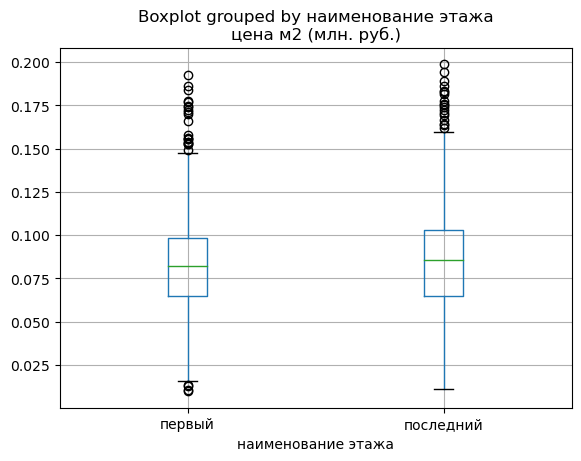

In [193]:
# Посмотрим на зависимость цены за м2 и наименованием этажа (первый/последний)


data_first_last_floor = data_new[data_new['наименование этажа'] != 'другой']
data_first_last_floor.boxplot('цена м2 (млн. руб.)',
                              by = 'наименование этажа')

In [194]:
data[data['наименование этажа'] != 'другой'].groupby('наименование этажа')['цена м2 (млн. руб.)'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
наименование этажа,,,,,,,,
первый,2912.0,0.082,0.038,0.01,0.061,0.081,0.098,0.813
последний,3330.0,0.093,0.067,0.00,0.065,0.088,0.108,1.908


Вывод по зависимости цены м2 от этажа: 

        
Межквартильный размахи схожи, и медиана практически на одном уровне --> цены за м2 схожи (по совокупности), средняя цена за м2 при покупке первого этажа: 82 000 руб.
                                                                                                                                                   последнего: 93 000 руб.

In [195]:
# Рассмотрим зависимость цены м2 и расстояния до центра, даты размещения: дня недели, месяца и года.

# Сделаем предподготовку и разобъём цена за м2 на статусы: дешево, средне, дорого

q1_cost = data_new['цена м2 (млн. руб.)'].quantile(0.25)
q2_cost = data_new['цена м2 (млн. руб.)'].quantile(0.5)
q3_cost = data_new['цена м2 (млн. руб.)'].quantile(0.75)


def status_m2(x):
    if x <= q1_cost:
        return 'дешево'
    if x > q3_cost:
        return 'дорого'
    else:
        return 'средне'

data_new['Статус цены м2'] = data['цена м2 (млн. руб.)'].map(status_m2)
data_new

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,апартаменты (булев тип),...,расстояние до ближайшего водоёма (км),сколько дней было размещено объявление (от публикации до снятия),цена м2 (млн. руб.),Публикация (день недели),Публикация (месяц),Публикация (год),наименование этажа,доля жилой площади,доля площади кухни,Статус цены м2
9,18,5.40,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,289.0,0.088525,Sunday,February,2017,другой,0.71,0.11,средне
10,5,5.05,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,0.553,137.0,0.127525,Thursday,November,2017,другой,0.51,0.21,дорого
13,20,3.55,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,0.298,366.0,0.082944,Saturday,July,2017,последний,0.63,0.12,средне
16,11,6.70,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,NaN,397.0,0.081707,Thursday,November,2017,первый,0.68,0.11,средне
18,8,3.25,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,NaN,168.0,0.104839,Friday,January,2017,другой,0.63,0.18,средне
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9.20,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,NaN,23.0,0.091089,Monday,April,2019,другой,0.62,0.15,средне
23689,13,3.55,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,0.652,29.0,0.100567,Wednesday,February,2018,другой,0.46,0.26,средне
23691,11,9.47,72.9,2016-10-13,2,2.75,25.0,40.3,7,False,...,0.806,519.0,0.129904,Thursday,October,2016,другой,0.55,0.15,дорого
23693,9,4.60,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,0.675,239.0,0.073718,Friday,August,2016,другой,0.64,0.13,дешево


<Axes: title={'center': 'расстояние до центра города (км)'}, xlabel='Статус цены м2'>

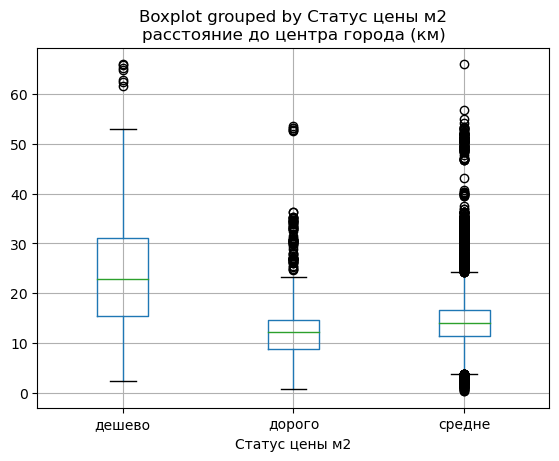

In [196]:
data_new.boxplot('расстояние до центра города (км)',
                 by = 'Статус цены м2')

<Axes: title={'center': 'цена м2 (млн. руб.)'}, xlabel='Публикация (день недели)'>

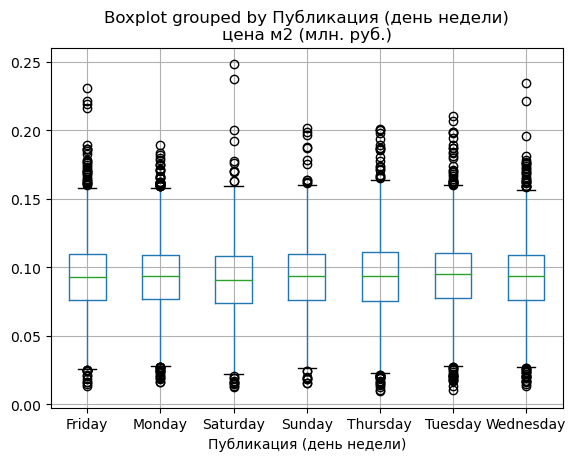

In [197]:
data_new.boxplot('цена м2 (млн. руб.)',
                 by = 'Публикация (день недели)')

<Axes: title={'center': 'цена м2 (млн. руб.)'}, xlabel='Публикация (месяц)'>

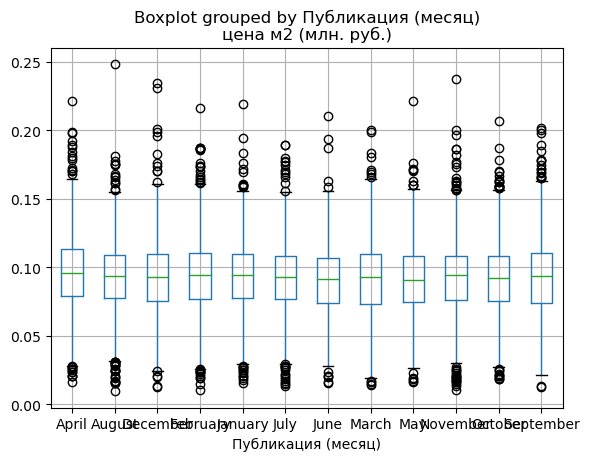

In [198]:
data_new.boxplot('цена м2 (млн. руб.)',
                 by = 'Публикация (месяц)')

<Axes: title={'center': 'цена м2 (млн. руб.)'}, xlabel='Публикация (год)'>

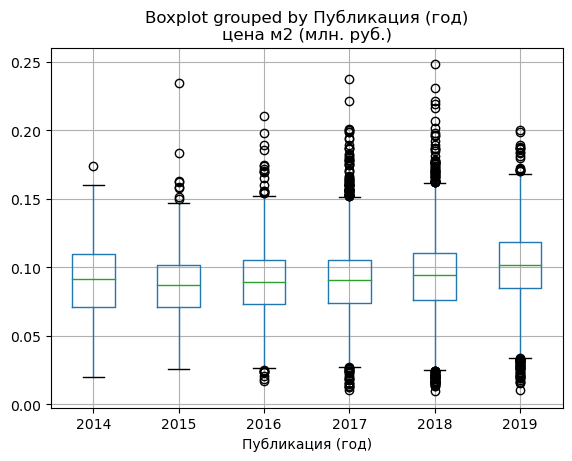

In [199]:
data_new.boxplot('цена м2 (млн. руб.)',
                 by = 'Публикация (год)')

### Итоговый вывод:


#### От чего зависит цена квадратного метра:

            1) кол-во этажей в доме
            2) цена на момент снятия (это очевидный факт при рассматривании м2)
            3) от расстояния до центра города



#### От чего зависит цена квартиры/помещения:


            1) Площадь квартиры
            2) Жилая площадь (из-за прямой связи с площадью квартиры)
            3) Площадь кухни (из-за прямой связи с площадью квартиры)
            4) Число комнат
            5) Высота потолков
            6) Расстояние до центра города (чем дальше - тем дешевле)


	
#### Вывод по зависимости цены м2 от этажа (первый/последний): 

        
             цены за м2 схожи (по совокупности), но первый (в среднем) обходится дешевле



#### Вывод по зависимости цены за м2 от расстояния до центра города: 
		

	     
	     1) Дешевые квартиры в среднем находятся дальше от центра (медианное значение -  23 км, также большой межквартильный размах --> 50 % квартир находится в хоне 15-31 км от центра)
	     2) Дорогие квартиры сконцентрированы в малом межквартильном размахе (9 - 15 км от центра)
         3) Средние по стоимости (за м2) квартиры приближены к дорогим (медиана - 14 км, узкий межквартильный размах --> 50% квартир находится в диапазоне (11 - 16 км от центра)

	     

#### Вывод по зависимости цены за м2 и День недели / Месяц публикации объявления


	     Зависимости нет - все показатели идентичны


#### Вывод по зависимости цены за м2 и года публикации объявления

	    Падение цены в 2014, и рост 2015-2019 годах

----------------------------------------------------------------------------------------------------------------

### Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

In [200]:
data_not_SPB = data_new[data_new['название населённого пункта'] != 'санкт-петербург']
data_not_SPB['название населённого пункта'].value_counts().head(10) # кол-во объявлений по пригородам

всеволожск           239
поселок шушары       197
пушкин               186
колпино              185
поселок мурино       183
поселок парголово    130
петергоф             129
гатчина              129
красное село         102
сестрорецк           101
Name: название населённого пункта, dtype: int64

In [201]:
indexes_head_prigorod = data_not_SPB['название населённого пункта'].value_counts().head(10).index
data_head_prigorod = data_not_SPB.set_index('название населённого пункта').loc[indexes_head_prigorod].reset_index().rename({'index': 'название населённого пункта'}, axis = 1)
data_head_prigorod.groupby('название населённого пункта')['цена м2 (млн. руб.)'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
название населённого пункта,,,,,,,,
всеволожск,239.0,0.067,0.013,0.031,0.060,0.066,0.073,0.136
гатчина,129.0,0.069,0.013,0.018,0.061,0.068,0.077,0.103
колпино,185.0,0.075,0.012,0.053,0.067,0.074,0.083,0.119
красное село,102.0,0.074,0.012,0.042,0.065,0.073,0.080,0.102
петергоф,129.0,0.083,0.014,0.058,0.074,0.082,0.088,0.150
поселок мурино,183.0,0.087,0.015,0.053,0.076,0.084,0.098,0.139
поселок парголово,130.0,0.091,0.018,0.049,0.080,0.091,0.102,0.139
поселок шушары,197.0,0.079,0.013,0.054,0.069,0.078,0.087,0.127
пушкин,186.0,0.100,0.016,0.060,0.089,0.098,0.107,0.160


<Axes: title={'center': 'цена м2 (млн. руб.)'}, xlabel='название населённого пункта'>

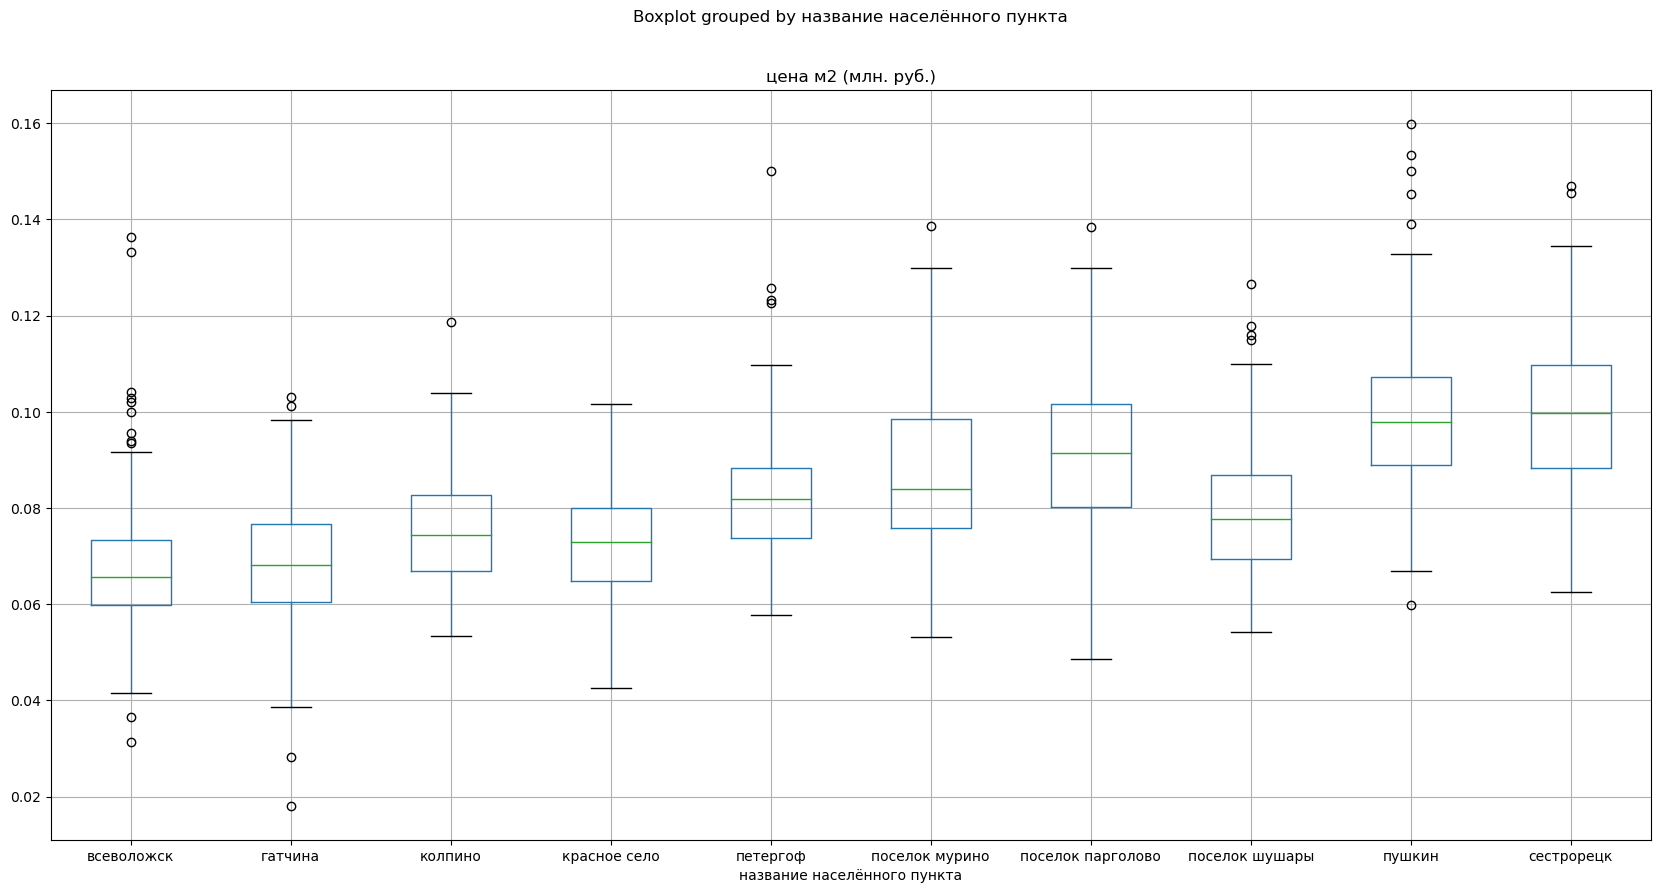

In [202]:
data_head_prigorod.boxplot('цена м2 (млн. руб.)',
                           by = 'название населённого пункта',
                           figsize=(20,10))

In [203]:
# Сравним Саект-Петербург и его пригороды (10)

data_new_analyst_prigorod = data_new.copy()

def prigorod_yes_or_not(x):
    if x == 'санкт-петербург':
        return 'город'
    else:
        return 'пригород'



data_new_analyst_prigorod['Статус пригорода'] = data_new_analyst_prigorod['название населённого пункта'].map(prigorod_yes_or_not)
data_new_analyst_prigorod.groupby('Статус пригорода')['цена м2 (млн. руб.)'].mean().round(3)

Статус пригорода
город       0.105
пригород    0.068
Name: цена м2 (млн. руб.), dtype: float64

<Axes: title={'center': 'цена м2 (млн. руб.)'}, xlabel='Статус пригорода'>

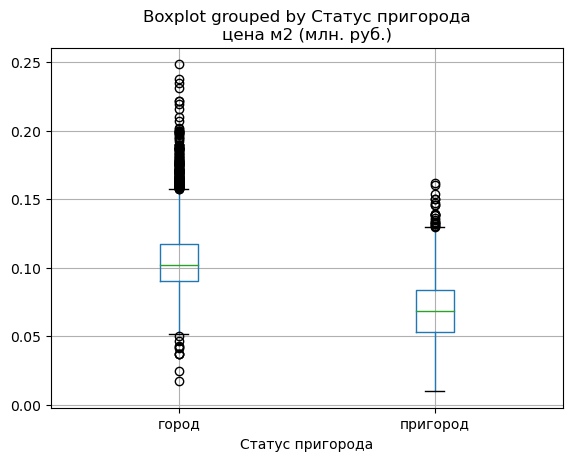

In [204]:
data_new_analyst_prigorod.boxplot('цена м2 (млн. руб.)',
                                  by = 'Статус пригорода')

Вывод: 


			1) В городе цена за м2 выше ( в среднем 105 000 руб., против 68 000 руб. (пригород))
			2) Цены по различным пригородам - отличаются, местами значительно (Например Всеволжск: 67 000 руб.
												Сестроецк: 100 000 руб.)
			3) Цены по различным пригородам варируются в среднем 67 - 100 тыс. руб.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 100 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

In [205]:
data_notnull_centre = data_new[data_new['расстояние до центра города (км)'].notnull()]      # Здесь все значения площади и кол-ва комнат тоже не нулевые


######################### Сегментация по расстоянию ####################################
q1 = data_notnull_centre['расстояние до центра города (км)'].quantile(0.25)


def segmentaciya_po_rasstoyaniu(x):
    if x <= q1:
        return 'центр'
    else:
        return 'вне центра'


data_notnull_centre['центр/не центр'] = data_notnull_centre['расстояние до центра города (км)'].map(segmentaciya_po_rasstoyaniu)

########################## Сегментация по числу комнат ##################################

def segmentaciya_po_chislu_komnat(x):
    if x == 1:
        return 'однушка'
    if x == 2:
        return 'двушка'
    if x == 3:
        return 'трешка'
    else:
        return 'многокомнатная'
    


data_notnull_centre['статус числа комнат'] = data_notnull_centre['число комнат'].map(segmentaciya_po_chislu_komnat)

######################### Сегментация по площади #####################################################

q1,q2,q3 = data_notnull_centre['площадь квартиры в квадратных метрах (м²)'].quantile([0.25, 0.5, 0.75])

def segmenyaciya_po_ploshadi(x):
    if x <= q1:
        return f'S < {int(q1)}'
    if x >= q3:
        return f'S > {int(q3)}'
    else:
        return f' {int(q1)} < S < {int(q3)}'
    

data_notnull_centre['статус площади квартиры'] = data_notnull_centre['площадь квартиры в квадратных метрах (м²)'].map(segmenyaciya_po_ploshadi)

data_notnull_centre


C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\2552237293.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_notnull_centre['центр/не центр'] = data_notnull_centre['расстояние до центра города (км)'].map(segmentaciya_po_rasstoyaniu)
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\2552237293.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_notnull_centre['статус числа комнат'] = data_notnull_centre['число комнат'].map(segmentaciya_po_chislu_komnat)
C:\Users\oudel\AppData\Local\Temp\ipykern

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,апартаменты (булев тип),...,Публикация (день недели),Публикация (месяц),Публикация (год),наименование этажа,доля жилой площади,доля площади кухни,Статус цены м2,центр/не центр,статус числа комнат,статус площади квартиры
9,18,5.40,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,Sunday,February,2017,другой,0.71,0.11,средне,вне центра,трешка,40 < S < 64
10,5,5.05,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,Thursday,November,2017,другой,0.51,0.21,дорого,вне центра,однушка,S < 40
13,20,3.55,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,Saturday,July,2017,последний,0.63,0.12,средне,вне центра,двушка,40 < S < 64
16,11,6.70,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,Thursday,November,2017,первый,0.68,0.11,средне,центр,трешка,S > 64
18,8,3.25,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,Friday,January,2017,другой,0.63,0.18,средне,центр,однушка,S < 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3.30,31.0,2017-04-29,1,2.55,9.0,18.0,6,False,...,Saturday,April,2017,другой,0.58,0.21,средне,вне центра,однушка,S < 40
23688,19,9.20,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,Monday,April,2019,другой,0.62,0.15,средне,вне центра,трешка,S > 64
23689,13,3.55,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,Wednesday,February,2018,другой,0.46,0.26,средне,вне центра,однушка,S < 40
23691,11,9.47,72.9,2016-10-13,2,2.75,25.0,40.3,7,False,...,Thursday,October,2016,другой,0.55,0.15,дорого,центр,двушка,S > 64


In [206]:
# Посмотрим на количество объявлений по каждому сегменту

count_data = data_notnull_centre.groupby(['центр/не центр','статус числа комнат', 'статус площади квартиры'])\
                                [data_notnull_centre[data_notnull_centre.notnull()].columns]\
                                .count()\
                                .sort_values(ascending=False,
                                             by = 'цена на момент снятия с публикации (млн. руб.)')
count_data

число фотографий квартиры в объявлении  \
центр/не центр статус числа комнат статус площади квартиры                                           
вне центра     двушка               40 < S < 64                                               1865   
               однушка             S < 40                                                     1808   
               трешка              S > 64                                                      930   
               однушка              40 < S < 64                                                699   
               трешка               40 < S < 64                                                690   
центр          двушка               40 < S < 64                                                649   
               трешка              S > 64                                                      415   
               однушка             S < 40                                                      414   
вне центра     двушка              S > 64                                                      350   
центр          однушка              40 < S < 64                                                207   
               двушка              S > 64                                                      195   
вне центра     многокомнатная      S > 64                                                      173   
центр          трешка               40 < S < 64                                                170   
               многокомнатная      S > 64                                                      128   
вне центра     многокомнатная       40 < S < 64                                                 50   
               двушка              S < 40                                                       19   
центр          двушка              S < 40                                                       10   
вне центра     однушка             S > 64                                                        6   
центр          однушка             S > 64                                                        5   
               многокомнатная       40 < S < 64                                                  4   

                                                            цена на момент снятия с публикации (млн. руб.)  \
центр/не центр статус числа комнат статус площади квартиры                                                   
вне центра     двушка               40 < S < 64                                                       1865   
               однушка             S < 40                                                             1808   
               трешка              S > 64                                                              930   
               однушка              40 < S < 64                                                        699   
               трешка               40 < S < 64                                                        690   
центр          двушка               40 < S < 64                                                        649   
               трешка              S > 64                                                              415   
               однушка             S < 40                                                              414   
вне центра     двушка              S > 64                                                              350   
центр          однушка              40 < S < 64                                                        207   
               двушка              S > 64                                                              195   
вне центра     многокомнатная      S > 64                                                              173   
центр          трешка               40 < S < 64                                                        170   
               многокомнатная      S > 64                                                              128   
вне центра     многокомнатная       40 < S < 64        

In [207]:
# Выберем данные с не менее 100 объявлениями

indexes_100 = count_data[count_data['цена на момент снятия с публикации (млн. руб.)'] >= 100].index
indexes_100

MultiIndex([('вне центра',         'двушка', ' 40 < S < 64'),
            ('вне центра',        'однушка',       'S < 40'),
            ('вне центра',         'трешка',       'S > 64'),
            ('вне центра',        'однушка', ' 40 < S < 64'),
            ('вне центра',         'трешка', ' 40 < S < 64'),
            (     'центр',         'двушка', ' 40 < S < 64'),
            (     'центр',         'трешка',       'S > 64'),
            (     'центр',        'однушка',       'S < 40'),
            ('вне центра',         'двушка',       'S > 64'),
            (     'центр',        'однушка', ' 40 < S < 64'),
            (     'центр',         'двушка',       'S > 64'),
            ('вне центра', 'многокомнатная',       'S > 64'),
            (     'центр',         'трешка', ' 40 < S < 64'),
            (     'центр', 'многокомнатная',       'S > 64')],
           names=['центр/не центр', 'статус числа комнат', 'статус площади квартиры'])

In [208]:
data_notnull_centre.set_index(['центр/не центр','статус числа комнат', 'статус площади квартиры']).reset_index()

,центр/не центр,статус числа комнат,статус площади квартиры,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,...,расстояние до ближайшего водоёма (км),сколько дней было размещено объявление (от публикации до снятия),цена м2 (млн. руб.),Публикация (день недели),Публикация (месяц),Публикация (год),наименование этажа,доля жилой площади,доля площади кухни,Статус цены м2
0,вне центра,трешка,40 < S < 64,18,5.40,61.0,2017-02-26,3,2.50,9.0,...,NaN,289.0,0.088525,Sunday,February,2017,другой,0.71,0.11,средне
1,вне центра,однушка,S < 40,5,5.05,39.6,2017-11-16,1,2.67,12.0,...,0.553,137.0,0.127525,Thursday,November,2017,другой,0.51,0.21,дорого
2,вне центра,двушка,40 < S < 64,20,3.55,42.8,2017-07-01,2,2.56,5.0,...,0.298,366.0,0.082944,Saturday,July,2017,последний,0.63,0.12,средне
3,центр,трешка,S > 64,11,6.70,82.0,2017-11-23,3,3.05,5.0,...,NaN,397.0,0.081707,Thursday,November,2017,первый,0.68,0.11,средне
4,центр,однушка,S < 40,8,3.25,31.0,2017-01-27,1,2.50,5.0,...,NaN,168.0,0.104839,Friday,January,2017,другой,0.63,0.18,средне
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,вне центра,однушка,S < 40,8,3.30,31.0,2017-04-29,1,2.55,9.0,...,0.317,193.0,0.106452,Saturday,April,2017,другой,0.58,0.21,средне
8783,вне центра,трешка,S > 64,19,9.20,101.0,2019-04-01,3,3.05,15.0,...,NaN,23.0,0.091089,Monday,April,2019,другой,0.62,0.15,средне
8784,вне центра,однушка,S < 40,13,3.55,35.3,2018-02-28,1,2.86,15.0,...,0.652,29.0,0.100567,Wednesday,February,2018,другой,0.46,0.26,средне
8785,центр,двушка,S > 64,11,9.47,72.9,2016-10-13,2,2.75,25.0,...,0.806,519.0,0.129904,Thursday,October,2016,другой,0.55,0.15,дорого


In [209]:
corr_series_data = \
data_notnull_centre.set_index(['центр/не центр','статус числа комнат', 'статус площади квартиры'])\
                   .loc[indexes_100]\
                   .reset_index()\
                   .groupby(['центр/не центр','статус числа комнат', 'статус площади квартиры'])[data_notnull_centre.notnull().columns]\
                   .corr()\
                   .sort_values(ascending=False,
                                by = 'цена на момент снятия с публикации (млн. руб.)')\
                   ['цена на момент снятия с публикации (млн. руб.)']


corr_dataframe_data = pd.DataFrame(corr_series_data)

corr_itog = \
corr_dataframe_data[(corr_dataframe_data['цена на момент снятия с публикации (млн. руб.)'] != 1) & corr_dataframe_data['цена на момент снятия с публикации (млн. руб.)'].notnull()]
corr_itog

C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\1108243378.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_notnull_centre.set_index(['центр/не центр','статус числа комнат', 'статус площади квартиры'])\


цена на момент снятия с публикации (млн. руб.)
центр/не центр статус числа комнат статус площади квартиры                                                                                 
центр          трешка               40 < S < 64            цена м2 (млн. руб.)                                                     0.928922
вне центра     двушка              S > 64                  цена м2 (млн. руб.)                                                     0.920951
               однушка              40 < S < 64            цена м2 (млн. руб.)                                                     0.909372
центр          однушка              40 < S < 64            цена м2 (млн. руб.)                                                     0.906604
               двушка              S > 64                  цена м2 (млн. руб.)                                                     0.897959
...                                                                                                                                     ...
вне центра     трешка               40 < S < 64            расстояние до центра города (км)                                       -0.359532
               двушка               40 < S < 64            доля жилой площади                                                     -0.411802
               однушка             S < 40                  расстояние до центра города (км)                                       -0.413922
центр          однушка             S < 40                  расстояние до центра города (км)                                       -0.416337
               трешка               40 < S < 64            расстояние до центра города (км)                                       -0.503156

[274 rows x 1 columns]

In [210]:
corr_itog = corr_itog.reset_index().rename({'level_3': 'наименование признака'}, axis =1)
corr_itog

,центр/не центр,статус числа комнат,статус площади квартиры,наименование признака,цена на момент снятия с публикации (млн. руб.)
0,центр,трешка,40 < S < 64,цена м2 (млн. руб.),0.928922
1,вне центра,двушка,S > 64,цена м2 (млн. руб.),0.920951
2,вне центра,однушка,40 < S < 64,цена м2 (млн. руб.),0.909372
3,центр,однушка,40 < S < 64,цена м2 (млн. руб.),0.906604
4,центр,двушка,S > 64,цена м2 (млн. руб.),0.897959
...,...,...,...,...,...
269,вне центра,трешка,40 < S < 64,расстояние до центра города (км),-0.359532
270,вне центра,двушка,40 < S < 64,доля жилой площади,-0.411802
271,вне центра,однушка,S < 40,расстояние до центра города (км),-0.413922
272,центр,однушка,S < 40,расстояние до центра города (км),-0.416337


In [211]:
# Выделим большие по модулю коэффициенты корреляции

corr_itog = corr_itog.sort_values(by = ['центр/не центр','статус числа комнат', 'наименование признака'])
corr_itog[((corr_itog['цена на момент снятия с публикации (млн. руб.)'] >= 0.4) |
          (corr_itog['цена на момент снятия с публикации (млн. руб.)'] <= -0.4))]
                                                 

,центр/не центр,статус числа комнат,статус площади квартиры,наименование признака,цена на момент снятия с публикации (млн. руб.)
17,вне центра,двушка,40 < S < 64,всего этажей в доме,0.592981
37,вне центра,двушка,40 < S < 64,высота потолков (м),0.404951
270,вне центра,двушка,40 < S < 64,доля жилой площади,-0.411802
34,вне центра,двушка,40 < S < 64,доля площади кухни,0.418216
14,вне центра,двушка,40 < S < 64,площадь квартиры в квадратных метрах (м²),0.658247
20,вне центра,двушка,40 < S < 64,площадь кухни (м²),0.584090
1,вне центра,двушка,S > 64,цена м2 (млн. руб.),0.920951
7,вне центра,двушка,40 < S < 64,цена м2 (млн. руб.),0.889167
35,вне центра,двушка,40 < S < 64,этаж,0.412667
21,вне центра,многокомнатная,S > 64,площадь квартиры в квадратных метрах (м²),0.560122


#### Вывод:


##### Для квартир "в центре" при покупке смотрят на следующие признаки:

	1) Однушка:
		
		1.1) Высота потолков
		1.2) Площадь всей квартиры
		1.3) Площадь кухни
		1.4) Цена за м2 (что очевидно) - далее этот признак нигде не учитываем
		1.5) Расстояние до центра
		
	Примечательно: при превышении 25% квантиля площади однушки (40 м2) - основные признаки сужались до Площади и Цены м2

	2) Двушка :

		к признакам однушки добавляется и жилая площадь
	Примечательно: 	при превышении 64 м2 (75% квантили) площади двушки основные признаки сужались Цены м2 

	3) Трешка : (по всем сегментам площади)


		3.1) Площадь
		3.2) Расстояние до центра

	4) Многокомнатная

		4.1) Жилая площадь


##### Для квартир "вне центра" при покупке смотрят на следующие признаки:


	1) Однушка:


		1.1) Всего этажей в доме
		1.2) Высота потолков
		1.3) Площадь
		1.4) Площадь кухни
		1.5) Расстояние до центра

	Примечательно: 	при превышении 25% квантиля площади (40 м2) однушки основные признаки сужались Цены м2 	

	2) Двушка:
		
		2.1) Всего этажей в доме
		2.2) Высота потолков
		2.3) Площадь
		2.4) Площадь кухни
		2.5) Этаж
	Примечательно: 	при превышении 64 м2 (75% квантили) площади двушки основные признаки сужались Цены м2 

	3) Трешка :

		3.1) Всего этажей
		3.2) Площадь
		3.3) Площадь кухни

	Примечательно: 	при превышении 64 м2 (75% квантили) площади трешки основные признаком Площадь кухни - мало инстересовались

	4) Многокомнатная:


		4.1) Площадь
	
		

-----------------------------------------------------------------------------------------------------------------------------------------------

#### Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

In [212]:
data_S_A_KCP = data[(data['апартаменты (булев тип)'] == True) | 
                    (data['квартира-студия (булев тип)'] == True) | 
                    (data['свободная планировка (булев тип)'] == True)]
                        
data_S_A_KCP

,число фотографий квартиры в объявлении,цена на момент снятия с публикации (млн. руб.),площадь квартиры в квадратных метрах (м²),дата публикации,число комнат,высота потолков (м),всего этажей в доме,жилая площадь (м²),этаж,апартаменты (булев тип),...,число водоёмов в радиусе 3 км,расстояние до ближайшего водоёма (км),сколько дней было размещено объявление (от публикации до снятия),цена м2 (млн. руб.),Публикация (день недели),Публикация (месяц),Публикация (год),наименование этажа,доля жилой площади,доля площади кухни
144,1,2.450,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,NaN,181.0,0.090741,Thursday,March,2017,другой,0.57,NaN
349,4,2.320,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,NaN,NaN,45.0,0.092800,Wednesday,September,2017,первый,0.68,NaN
440,8,2.480,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,2.0,0.982,64.0,0.091479,Monday,March,2018,другой,0.91,NaN
508,0,3.375,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,1.0,0.593,430.0,0.098110,Tuesday,March,2017,другой,0.71,NaN
543,11,12.790,56.60,2018-11-06,2,3.5,3.0,29.40,1,True,...,3.0,0.022,NaN,0.225972,Tuesday,November,2018,первый,0.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23236,18,13.900,95.00,2017-10-15,3,2.8,15.0,50.00,15,True,...,0.0,NaN,7.0,0.146316,Sunday,October,2017,последний,0.53,0.12
23442,0,2.500,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,...,NaN,NaN,4.0,0.090253,Thursday,September,2017,другой,0.65,NaN
23554,15,3.350,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,...,2.0,0.112,31.0,0.128846,Friday,September,2018,другой,NaN,NaN
23592,10,1.450,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,...,NaN,NaN,82.0,0.050000,Saturday,November,2017,другой,0.62,NaN


In [213]:
def corr_table(data,
               column):

    data_corr = \
    data[(data[column] == True)].corr() \
                                .sort_values(by = 'цена на момент снятия с публикации (млн. руб.)',
                                             ascending=False) \
                                ['цена на момент снятия с публикации (млн. руб.)']
    return data_corr


data_appartment = corr_table(data,
                             'апартаменты (булев тип)')

data_studia = corr_table(data,
                         'квартира-студия (булев тип)')

data_svobodnaya = corr_table(data,
                             'свободная планировка (булев тип)')

data_kvartira = data[(data['апартаменты (булев тип)'] != True) & 
                     (data['квартира-студия (булев тип)'] != True) &
                     (data['свободная планировка (булев тип)'] != True)]

data_kvartira_corr = data_kvartira.corr() \
                                  .sort_values(by = 'цена на момент снятия с публикации (млн. руб.)',
                                               ascending=False) \
                                  ['цена на момент снятия с публикации (млн. руб.)']


data_corr_table = pd.concat([data_appartment, data_studia, data_svobodnaya, data_kvartira_corr],axis = 1)
data_corr_table.columns = ['корреляция апартаментов (цена)','корреляция студий (цена)','корреляция кв. свободной планировки (цена)', 'корреляция квартир (цена)']
data_corr_table = data_corr_table.round(2)
data_corr_table

C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\4179457856.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[(data[column] == True)].corr() \
C:\Users\oudel\AppData\Local\Temp\ipykernel_8376\4179457856.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_kvartira_corr = data_kvartira.corr() \


,корреляция апартаментов (цена),корреляция студий (цена),корреляция кв. свободной планировки (цена),корреляция квартир (цена)
цена на момент снятия с публикации (млн. руб.),1.00,1.00,1.00,1.00
жилая площадь (м²),0.83,0.74,0.83,0.56
площадь квартиры в квадратных метрах (м²),0.81,0.85,0.96,0.65
площадь кухни (м²),0.70,NaN,NaN,0.52
сколько дней было размещено объявление (от публикации до снятия),0.67,0.13,0.02,0.08
цена м2 (млн. руб.),0.57,0.60,0.66,0.74
число парков в радиусе 3 км,0.45,0.00,0.30,0.15
число комнат,0.40,-0.05,0.39,0.36
число водоёмов в радиусе 3 км,0.29,0.01,0.19,0.16
этаж,0.12,-0.05,-0.08,0.03


In [214]:
# отберем основные признаки (по моему мнению)

spisok_priznakov = ['площадь квартиры в квадратных метрах (м²)',
                    'всего этажей в доме',
                    'жилая площадь (м²)',
                    'этаж',
                    'площадь кухни (м²)',
                    'расстояние до центра города (км)']


data_corr_table_main = data_corr_table.T[spisok_priznakov].T
data_corr_table_main

,корреляция апартаментов (цена),корреляция студий (цена),корреляция кв. свободной планировки (цена),корреляция квартир (цена)
площадь квартиры в квадратных метрах (м²),0.81,0.85,0.96,0.65
всего этажей в доме,-0.09,-0.14,-0.22,-0.00
жилая площадь (м²),0.83,0.74,0.83,0.56
этаж,0.12,-0.05,-0.08,0.03
площадь кухни (м²),0.70,NaN,NaN,0.52
расстояние до центра города (км),-0.45,-0.44,-0.30,-0.21


Вывод: 


	1) Все показатели по "не квартирам" схожи по влиянию/не влиянию на цену (как и в обычных квартирах)
	2) Отличается признак расстояние до центра: чем дальше от центра, тем дешевле аппартаменты и студии
	   квартиры и квартиры свободной планировки менее зависят от этого фактора  (студии и аппартаменты обычно находятся в черте города)
    3) Также признак жилой площади у квартир менее влияет на цену, чем у других (возможны 2 причины: 1) не равные выборки по каждому виду помещений 
                                                                                                     2) У апартаментов студий и кв. св. планировки - привалирует свободное пространство

----------------------------------------------------------------------------------------------------------------------------------------------

## 4. Результаты исследования


#### Общие выводы

    1) квартиры в черте города - дороже, чем вне его (правда вне города есть выбросы (ценовые) - возможно элитная застройка (дачи, котеджи и тд.))
    2) квартиры на первом этаже обычно - дешевле всех других
    3) цены всех видов помещений зависят в основном от: 1) кол-во этажей в доме
                                                        2) первый этаж или другой
                                                        3) жилая площадь
                                                        4) расстояние до центра города
    4) данные с выбросами и без дают практически идентичные основные показатели объявлений
    

#### Рекомендации


    1) Много пустых значений - настройка параметров на сайте (например обязательное заполнение полей (название местности, расстояние до центра, кол-во этажей и др. важных факторов, 
                                                              возможна автоматическое заполнение полей с помощью геолокации))
    2) Упрощение числовых данных (расстояние метры --> километры и float --> int по многим числовым признакам)
